<Figure size 1000x800 with 0 Axes>

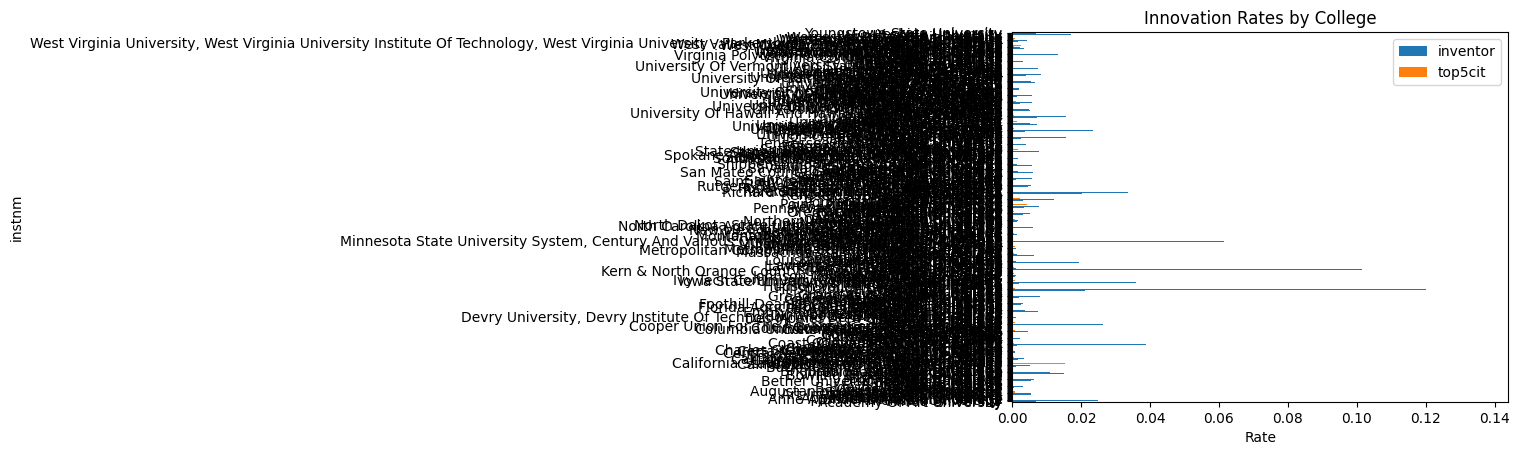

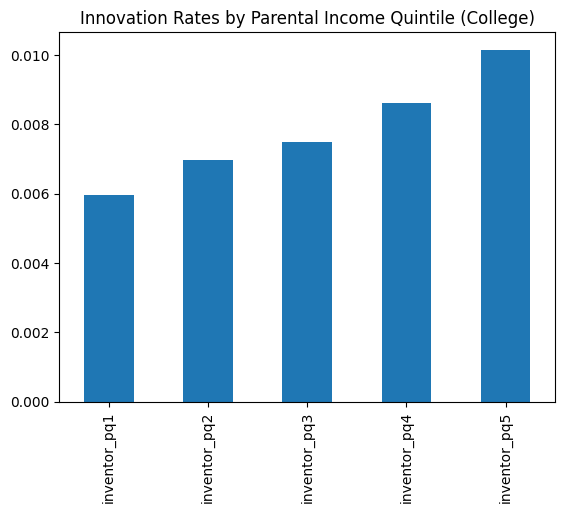

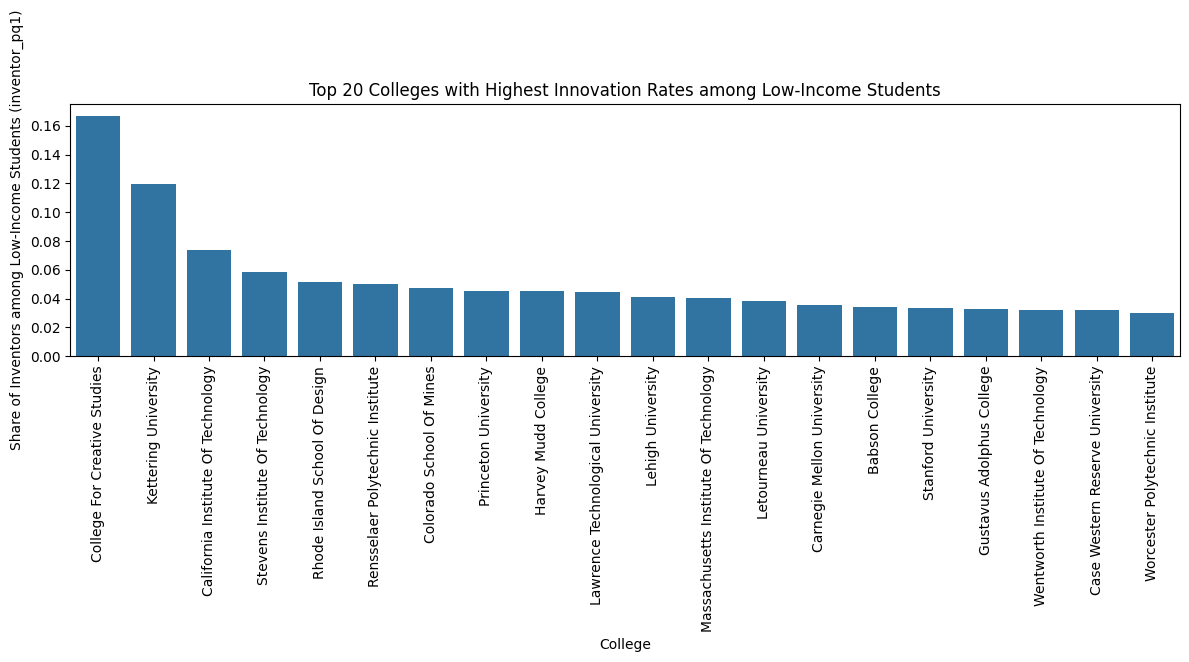

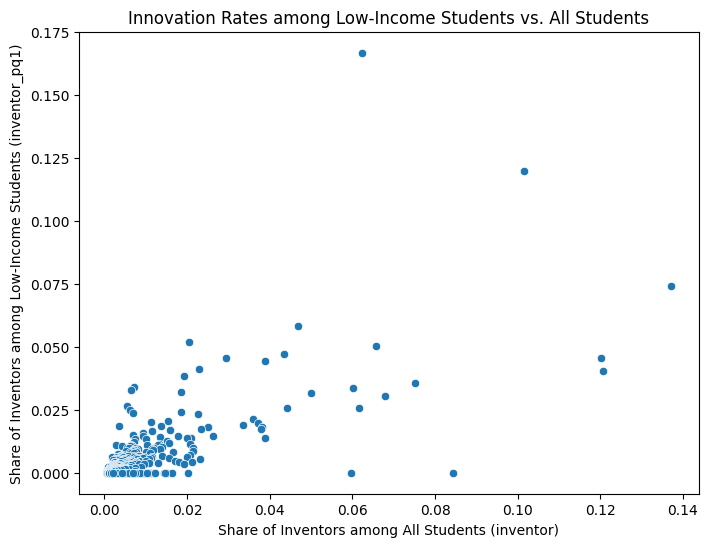

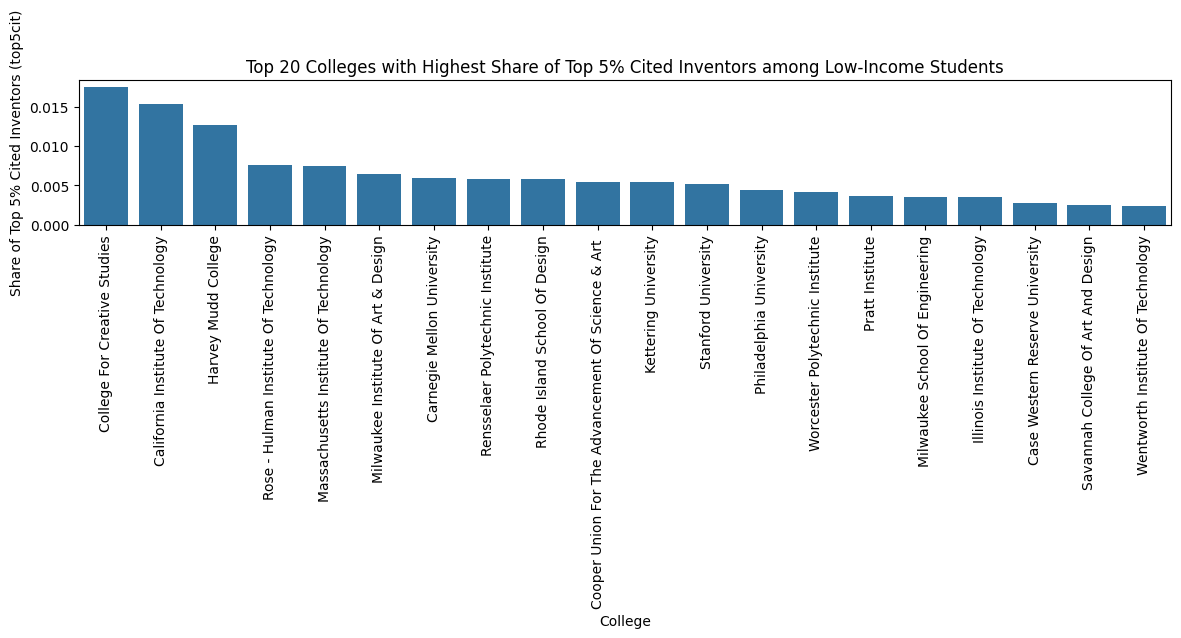

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load data tables
table1 = pd.read_csv('./code_and_data/data/excel/table_1a.csv')
table3 = pd.read_csv('./code_and_data/data/excel/table_3.csv') 
table4a = pd.read_csv('./code_and_data/data/excel/table_4a.csv')
table4b = pd.read_csv('./code_and_data/data/excel/table_4b.csv')

# Plot innovation rates by college
plt.figure(figsize=(10, 8))
table3.groupby('instnm')[['inventor', 'top5cit']].mean().plot.barh()
plt.title('Innovation Rates by College')
plt.xlabel('Rate')

plt.figure()
table3[['inventor_pq1', 'inventor_pq2', 'inventor_pq3', 'inventor_pq4', 'inventor_pq5']].mean().plot.bar()
plt.title('Innovation Rates by Parental Income Quintile (College)')

# Sort colleges by the share of inventors among low-income students (inventor_pq_1)
table3 = table3.sort_values(by='inventor_pq1', ascending=False)

# Select top 20 colleges with the highest inventor_pq_1 value
top_colleges = table3.head(20)

# Bar chart: Top 20 colleges with highest inventor_pq_1
plt.figure(figsize=(12, 6))
sns.barplot(x='instnm', y='inventor_pq1', data=top_colleges)
plt.xticks(rotation=90)
plt.title('Top 20 Colleges with Highest Innovation Rates among Low-Income Students')
plt.xlabel('College')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.tight_layout()
plt.show()

# Scatter plot: inventor_pq_1 vs. inventor
plt.figure(figsize=(8, 6))
sns.scatterplot(x='inventor', y='inventor_pq1', data=table3)
plt.title('Innovation Rates among Low-Income Students vs. All Students')
plt.xlabel('Share of Inventors among All Students (inventor)')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.show()

# Bar chart: Top 20 colleges with highest top5cit for low-income students
top_colleges_top5cit = table3.sort_values(by='top5cit', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='instnm', y='top5cit', data=top_colleges_top5cit)
plt.xticks(rotation=90)
plt.title('Top 20 Colleges with Highest Share of Top 5% Cited Inventors among Low-Income Students')
plt.xlabel('College')
plt.ylabel('Share of Top 5% Cited Inventors (top5cit)')
plt.tight_layout()
plt.show()

In [ ]:

table2a = pd.read_csv('./code_and_data/data/excel/table_2a.csv')

# Merge tables 1a and 2a
# merged = table1.merge(table2a, on=['cz', 'cohort'], how='inner') 

PatsyError: Error evaluating factor: NameError: name 'par_pq1' is not defined
    inventor ~ cz_inventor*par_pq1 + cz_inventor*par_pq5 + C(par_stateabbrv)
                           ^^^^^^^

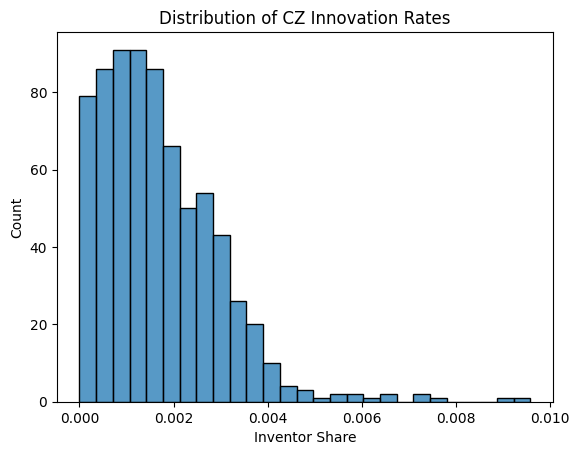

In [4]:
# 1. Exposure effects using Table 1a
# Calculate mean inventor share by CZ
cz_inventor = table1.groupby('par_cz')['inventor'].mean() 

# Plot distribution of CZ innovation rates
sns.histplot(cz_inventor)
plt.xlabel('Inventor Share')
plt.title('Distribution of CZ Innovation Rates')

# Interact gender and parental income with CZ innovation
table1['cz_inventor'] = table1['par_cz'].map(cz_inventor)

model = sm.OLS.from_formula("inventor ~ cz_inventor*par_pq1 + cz_inventor*par_pq5 + C(par_stateabbrv)", 
                             data=table1).fit()
print(model.summary())

                                                instnm  inventors_per_student
42                                 Harvey Mudd College               0.000164
31                  California Institute Of Technology               0.000159
392                       College For Creative Studies               0.000125
123              Rose - Hulman Institute Of Technology               0.000123
223  Cooper Union For The Advancement Of Science & ...               0.000076
215        New Mexico Institute Of Mining & Technology               0.000057
168                               Kettering University               0.000043
161                    Worcester Polytechnic Institute               0.000038
374                    Milwaukee School Of Engineering               0.000035
213                    Stevens Institute Of Technology               0.000035


/Users/richardchao/miniconda3/envs/cs285/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/richardchao/miniconda3/envs/cs285/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/richardchao/miniconda3/envs/cs285/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/richardchao/miniconda3/envs/cs285/lib/python3.9/site-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


                            OLS Regression Results                            
Dep. Variable:               inventor   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 May 2024   Prob (F-statistic):                nan
Time:                        12:35:09   Log-Likelihood:                 14908.
No. Observations:                 423   AIC:                        -2.897e+04
Df Residuals:                       0   BIC:                        -2.726e+04
Df Model:                         422                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

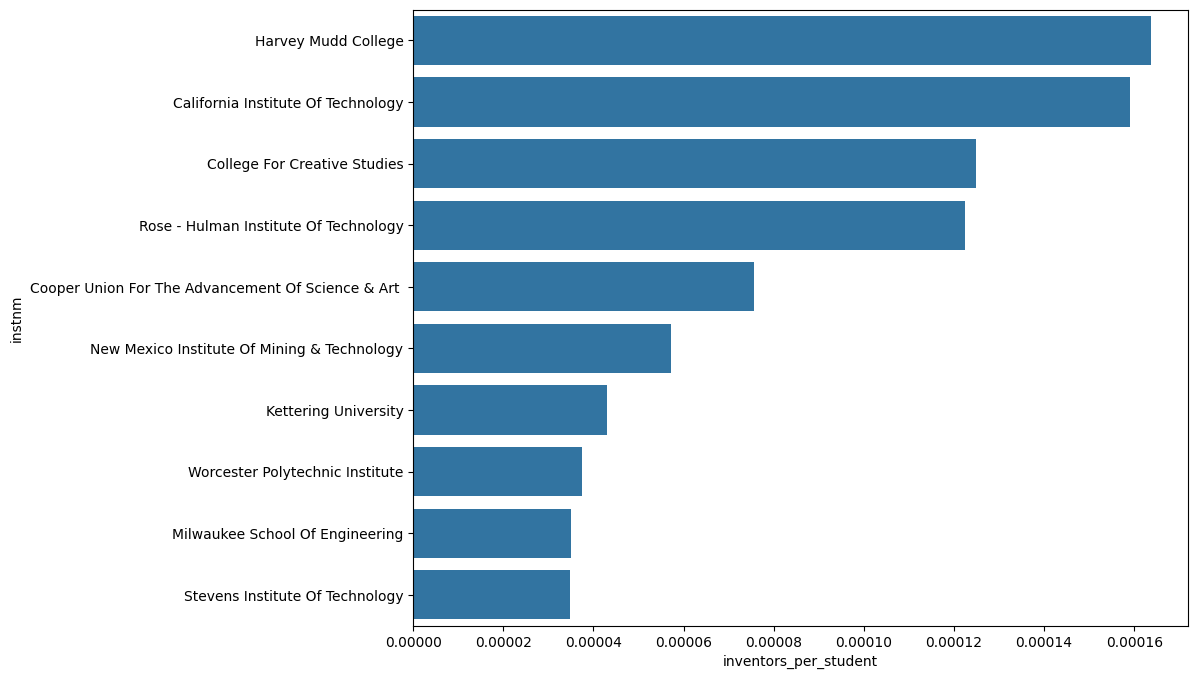

In [93]:

# 2. College innovation rates 
# Rank colleges by innovation rate
# college_innov = table3.sort_values('inventor', ascending=False)


# # Plot top 20
# top20 = college_innov.head(10)
# plt.figure(figsize=(10,8))
# sns.barplot(x='inventor', y='instnm', data=top20)
# print(top20[['instnm', 'inventor']])

# Create a new column with investors divided by students
table3['inventors_per_student'] = table3['inventor'] / table3['count']

# Sort by the new column in descending order
college_innov = table3.sort_values('inventors_per_student', ascending=False)

# Plot top 10 colleges
top10 = college_innov.head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='inventors_per_student', y='instnm', data=top10)
print(top10[['instnm', 'inventors_per_student']])

# Interact with parental income
model = sm.OLS.from_formula("inventor ~ C(super_opeid) + C(super_opeid):inventor_pq1 + C(super_opeid):inventor_pq5", data=table3).fit()
print(model.summary())

In [10]:

# Calculate percentiles of college innovation rates
table3['innovation_percentile'] = pd.qcut(table3['inventor'], q=5, labels=False)

# Estimate regression model with tier interactions
model = sm.OLS.from_formula("inventor ~ C(innovation_percentile) + C(innovation_percentile):inventor_pq1 + C(innovation_percentile):inventor_pq5", data=table3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               inventor   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1579.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        17:55:10   Log-Likelihood:                 2005.6
No. Observations:                 423   AIC:                            -3981.
Df Residuals:                     408   BIC:                            -3921.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
college_tiers = pd.read_csv('./code_and_data/data/excel/mrc_table2.csv')

# Merge college tier data with innovation data
merged_data = pd.merge(table3, college_tiers, left_on='instnm', right_on='name', how='left')

# Estimate regression model with tier interactions
model = sm.OLS.from_formula("inventor ~ C(tier) + C(tier):inventor_pq1 + C(tier):inventor_pq5", data=merged_data, cov_type='HC1').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               inventor   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1216.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        19:19:10   Log-Likelihood:                 2105.9
No. Observations:                 422   AIC:                            -4152.
Df Residuals:                     392   BIC:                            -4030.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/Users/richardchao/miniconda3/envs/cs285/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


/var/folders/8r/09lwc9312jl_hr20wdddssrm0000gn/T/ipykernel_19526/3374889035.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(table3['inventor'], shade=True)
/var/folders/8r/09lwc9312jl_hr20wdddssrm0000gn/T/ipykernel_19526/3374889035.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(table3['inventor_pq1'], shade=True)
/var/folders/8r/09lwc9312jl_hr20wdddssrm0000gn/T/ipykernel_19526/3374889035.py:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(table3['inventor_pq5'], shade=True)


0.0059760366430260045 0.001532


Text(0.5, 1.0, 'Distribution of College Innovation Rates (Box Plot)')

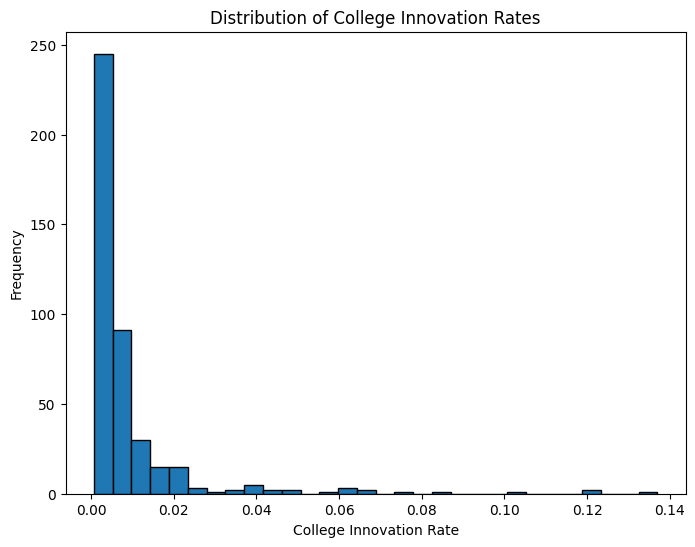

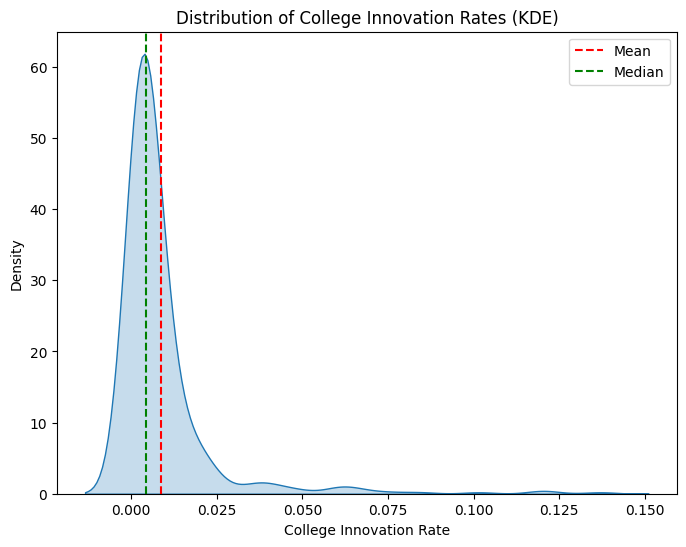

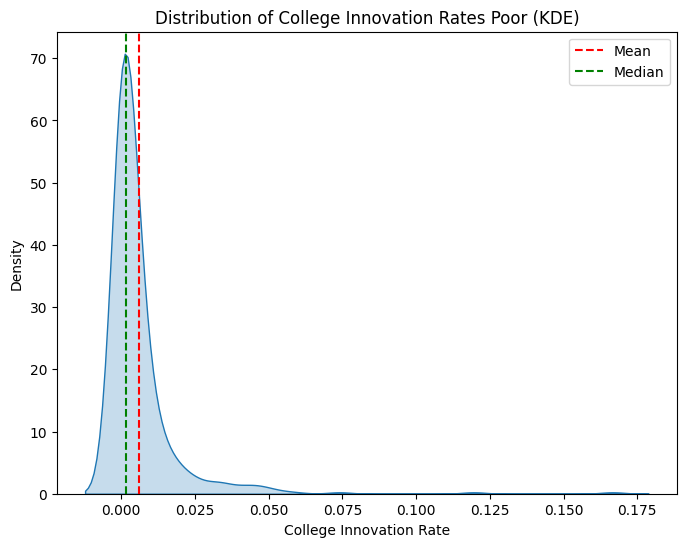

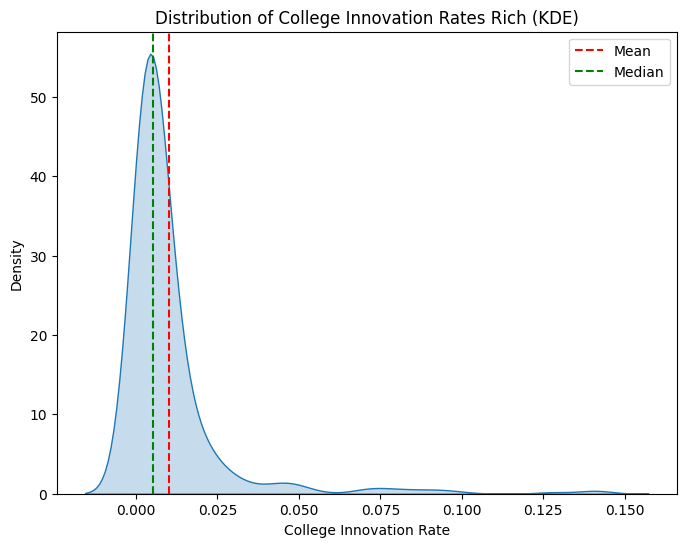

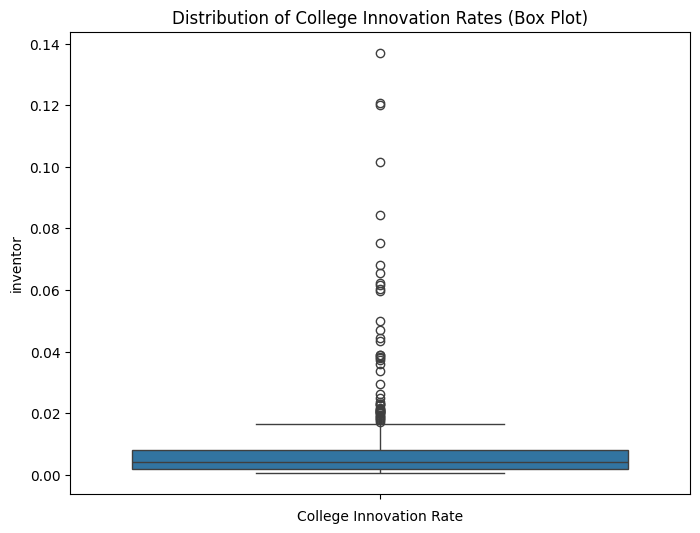

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(table3['inventor'], bins=30, edgecolor='black')
plt.xlabel('College Innovation Rate')
plt.ylabel('Frequency')
plt.title('Distribution of College Innovation Rates')

# KDE plot
# Calculate the mean and median
mean = table3['inventor'].mean()
median = table3['inventor'].median()
# Create the plot
plt.figure(figsize=(8, 6))
sns.kdeplot(table3['inventor'], shade=True)
# Add vertical lines for mean and median
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='--', label='Median')
plt.xlabel('College Innovation Rate')
plt.ylabel('Density')
plt.title('Distribution of College Innovation Rates (KDE)')
plt.legend()

# KDE plot poor
# Calculate the mean and median
mean = table3['inventor_pq1'].mean()
median = table3['inventor_pq1'].median()
print(mean, median)
# Create the plot
plt.figure(figsize=(8, 6))
sns.kdeplot(table3['inventor_pq1'], shade=True)
# Add vertical lines for mean and median
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='--', label='Median')
plt.xlabel('College Innovation Rate')
plt.ylabel('Density')
plt.title('Distribution of College Innovation Rates Poor (KDE)')
plt.legend()

# KDE plot rich
# Calculate the mean and median
mean = table3['inventor_pq5'].mean()
median = table3['inventor_pq5'].median()
# Create the plot
plt.figure(figsize=(8, 6))
sns.kdeplot(table3['inventor_pq5'], shade=True)
# Add vertical lines for mean and median
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='--', label='Median')
plt.xlabel('College Innovation Rate')
plt.ylabel('Density')
plt.title('Distribution of College Innovation Rates Rich (KDE)')
plt.legend()

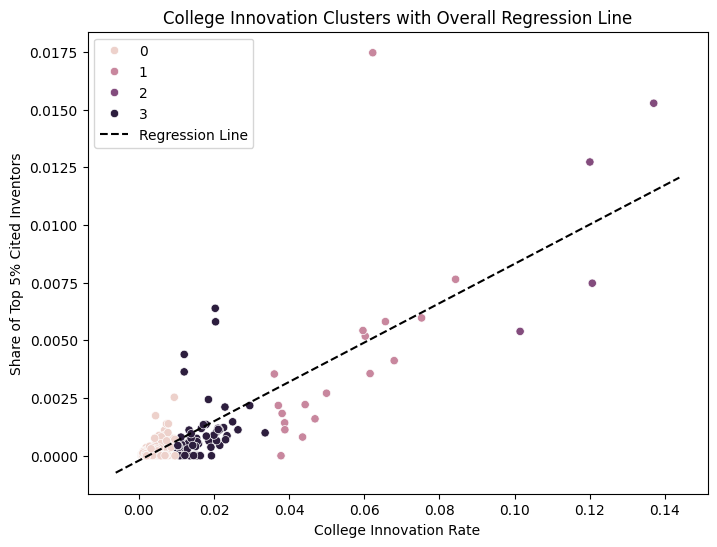

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for clustering
X = table3[['inventor', 'top5cit']].values

# Fit k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Add cluster labels to the dataframe
table3['cluster'] = kmeans.labels_

# Prepare the data for regression
X_reg = table3['inventor'].values.reshape(-1, 1)
y_reg = table3['top5cit'].values.reshape(-1, 1)

# Fit a linear regression model
reg = LinearRegression().fit(X_reg, y_reg)

# Plot innovation rates by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='inventor', y='top5cit', hue='cluster', data=table3)

# Add regression line over all data points
x_vals = np.array(plt.xlim())
y_vals = reg.intercept_[0] + reg.coef_[0][0] * x_vals
plt.plot(x_vals, y_vals, '--', color='black', label='Regression Line')

plt.xlabel('College Innovation Rate')
plt.ylabel('Share of Top 5% Cited Inventors')
plt.title('College Innovation Clusters with Overall Regression Line')
plt.legend()
plt.show()

In [ ]:
# 3. Innovation age profiles
# Calculate inventor share by age x gender x parental income in each CZ
age_profiles = merged.groupby(['age', 'cohort', 'par_stateabbrv', 'par_pq_1'])[['applicant_g_m', 'applicant_g_f']].mean().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='applicant_g_m', hue='par_pq_1', data=age_profiles)
plt.xlabel('Age') 
plt.ylabel('Male Inventor Share')
plt.title('Innovation Age Profiles by Parental Income')


In [ ]:
# 4. Inventor income distributions
# Plot wage earnings distribution 
plt.figure()
table4a.groupby(['age'])['w2_inc_p50'].plot()
plt.xlabel('Age')
plt.ylabel('Median Income ($)')
plt.title('Median Inventor Income by Age')

# Compare highly-cited inventors
table4b['citation_group'] = 'Highly-Cited'
table4a['citation_group'] = 'All'
income_data = pd.concat([table4a, table4b]) 

income_data = income_data[['age', 'citation_group', 'total_inc_mean']]
income_data = income_data.pivot(index='age', columns='citation_group', values='total_inc_mean')

income_data.plot(title='Mean Income by Age and Citation Group')
plt.xlabel('Age')
plt.ylabel('Mean Income ($)')

Measuring colleges with an outsized proportion of low-income innovators.

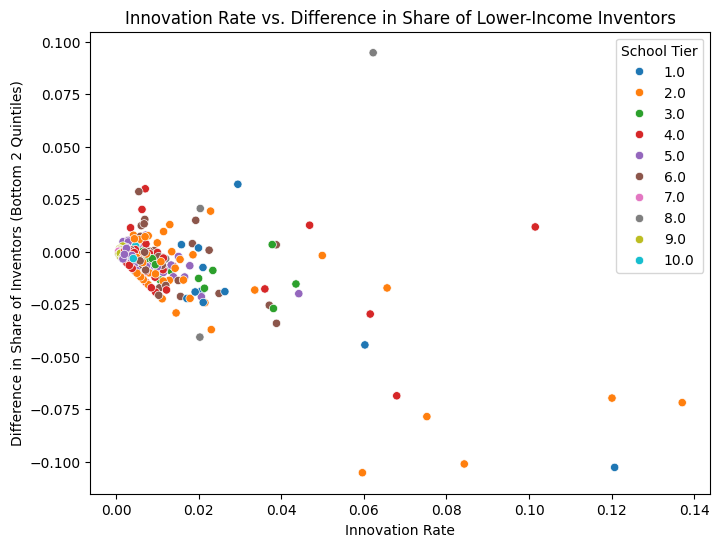

Schools with high share of lower-income inventors:
                               name tier  \
0      College For Creative Studies  8.0   
1              Kettering University  4.0   
3   Stevens Institute Of Technology  4.0   
4     Rhode Island School Of Design  8.0   
7              Princeton University  1.0   
10                Lehigh University  2.0   
12            Letourneau University  6.0   
59              Bucknell University  2.0   

                                        tier_name  inventor  diff_q1_q2  
0   Nonselective four-year private not-for-profit  0.062249    0.094800  
1                        Highly selective private  0.101480    0.011844  
3                        Highly selective private  0.046875    0.012665  
4   Nonselective four-year private not-for-profit  0.020408    0.020616  
7                                        Ivy Plus  0.029503    0.032163  
10       Other elite schools (public and private)  0.022904    0.019369  
12                              Se

In [ ]:
# Calculate difference between actual and expected share of lower-income inventors
merged_data['diff_q1'] = merged_data['inventor_pq1'] - merged_data['inventor']
merged_data['diff_q1_q2'] = (merged_data['inventor_pq1'] + merged_data['inventor_pq2']) - 2 * merged_data['inventor']
merged_data['diff_q1_q2_q3'] = (merged_data['inventor_pq1'] + merged_data['inventor_pq2'] + merged_data['inventor_pq3']) - 3 * merged_data['inventor']

# Scatter plot of innovation rate vs. difference in shares, colored by tier
plt.figure(figsize=(8, 6))
sns.scatterplot(x='inventor', y='diff_q1_q2', hue='tier', data=merged_data)
plt.xlabel('Innovation Rate')
plt.ylabel('Difference in Share of Inventors (Bottom 2 Quintiles)')
plt.title('Innovation Rate vs. Difference in Share of Lower-Income Inventors')
plt.legend(title='School Tier')
plt.show()

# Identify schools with significantly higher share of lower-income inventors
outliers = merged_data[(merged_data['diff_q1_q2'] > 0.01) & (merged_data['inventor'] > 0.01)]
print("Schools with high share of lower-income inventors:")
print(outliers[['name', 'tier', 'tier_name', 'inventor', 'diff_q1_q2']])

0.5962951671345514 0.6279598848953258
0.6585425092575337 0.6441208169136686


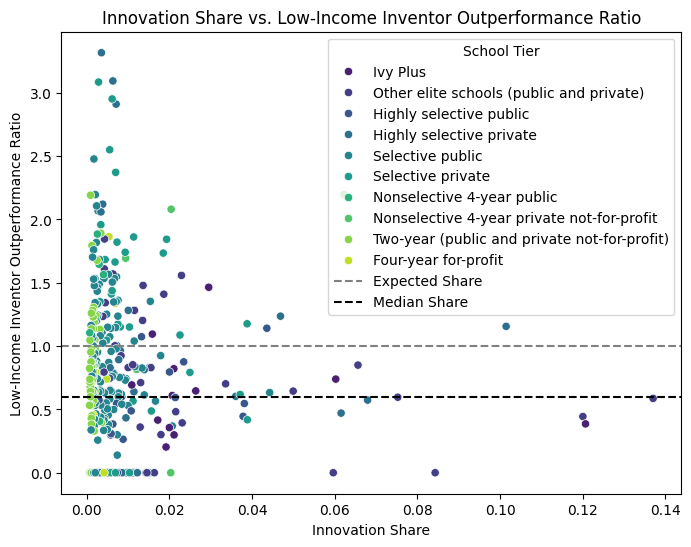

Schools with high share of lower-income inventors:
                                 name tier  \
0        College For Creative Studies  8.0   
4       Rhode Island School Of Design  8.0   
10                  Lehigh University  2.0   
7                Princeton University  1.0   
3     Stevens Institute Of Technology  4.0   
9   Lawrence Technological University  6.0   
1                Kettering University  4.0   
6            Colorado School Of Mines  3.0   

                                     tier_name  inventor     liior  diff_q1_q2  
0   Nonselective 4-year private not-for-profit  0.062249  2.195780    0.094800  
4   Nonselective 4-year private not-for-profit  0.020408  2.081009    0.020616  
10    Other elite schools (public and private)  0.022904  1.558260    0.019369  
7                                     Ivy Plus  0.029503  1.464620    0.032163  
3                     Highly selective private  0.046875  1.236495    0.012665  
9                            Selective private  

In [163]:

# Define the mapping between tier values and tier names
tier_map = {
    1: 'Ivy Plus',
    2: 'Other elite schools (public and private)',
    3: 'Highly selective public',
    4: 'Highly selective private',
    5: 'Selective public',
    6: 'Selective private',
    7: 'Nonselective 4-year public',
    8: 'Nonselective 4-year private not-for-profit',
    9: 'Two-year (public and private not-for-profit)',
    10: 'Four-year for-profit',
    11: 'Two-year for-profit',
    12: 'Less than two year schools of any type',
    13: 'Attending college with insufficient data',
    14: 'Not in college between the ages of 19-22'
}

merged_data['avg_quintile_share'] = (merged_data['inventor_pq1'] + merged_data['inventor_pq2'] + merged_data['inventor_pq3'] + merged_data['inventor_pq4'] + merged_data['inventor_pq5']) / 5
# Calculate difference between actual and expected share of lower-income inventors
merged_data['liior'] = merged_data['inventor_pq1'] / (merged_data['avg_quintile_share'])

# Calculate the difference between the average quintile inventor share and the overall inventor share
horizontal_median = merged_data['liior'].median()
# median for ivy plus schools
ivy_plus_median = merged_data[merged_data['tier'] == 1]['liior'].median()
print (horizontal_median, ivy_plus_median)
print (merged_data['liior'].mean(), merged_data[merged_data['tier'] == 1]['liior'].mean())
# Replace tier ranks with their corresponding tier names
merged_data['tier_name'] = merged_data['tier'].map(tier_map)
# Add horizontal line at liior = 1
# Scatter plot of innovation rate vs. difference in shares, colored by tier names
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='inventor', y='liior', hue='tier_name', data=merged_data, palette='viridis')
ax.axhline(y=1, linestyle='--', color='gray', label='Expected Share')
ax.axhline(y=horizontal_median, linestyle='--', color='black', label='Median Share')
# ax.axhline(y=ivy_plus_median, linestyle='--', color='red', label='Ivy Plus Median Share')
plt.xlabel('Innovation Share')
plt.ylabel('Low-Income Inventor Outperformance Ratio')
plt.title('Innovation Share vs. Low-Income Inventor Outperformance Ratio')
plt.legend(title='School Tier')
plt.show()



# Identify schools with significantly higher share of lower-income inventors
outliers = merged_data[(merged_data['liior'] > 1.1) & (merged_data['inventor'] > 0.02)]
# rank by liior
outliers = outliers.sort_values(by='liior', ascending=False)
print("Schools with high share of lower-income inventors:")
print(outliers[['name', 'tier', 'tier_name', 'inventor', 'liior', 'diff_q1_q2']])

rdinal logistic regression model estimates the relationship between school tiers, innovation rates, and the difference in the share of lower-income inventors. By predicting the probabilities of each school belonging to each tier based on these factors, we can identify schools that have a higher share of lower-income inventors than expected given their overall innovation rate and predicted tier.

In [71]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Prepare data for ordinal logistic regression
merged_data['tier'] = merged_data['tier'].astype('category')
merged_data['tier_cat'] = merged_data['tier'].cat.codes

# Fit ordinal logistic regression model
model_ordinal = OrderedModel.from_formula("tier_cat ~ inventor + diff_q1_q2_q3", data=merged_data, distr='logit').fit(method='bfgs')
print(model_ordinal.summary())

# Predict probabilities for each tier
# Predict probabilities for each tier
probabilities = model_ordinal.model.predict(model_ordinal.params, exog=merged_data[['inventor', 'diff_q1_q2_q3']])
merged_data['tier_prob'] = probabilities[:, -1]  # Assign the last column of probabilities to 'tier_prob'
# probabilities = model_ordinal.model.predict(model_ordinal.params, exog=merged_data[['inventor', 'diff_q1_q2_q3']])
# merged_data['tier_prob'] = probabilities

# Identify schools with high probabilities of being in lower tiers despite high share of lower-income inventors
outliers = merged_data[(merged_data['diff_q1_q2_q3'] > 0.03) & (merged_data['tier_prob'] < 0.50)]
print("Schools with high share of lower-income inventors and lower predicted tier:")
print(outliers[['name', 'tier', 'inventor', 'diff_q1_q2_q3', 'tier_prob']])

Optimization terminated successfully.
         Current function value: 1.818745
         Iterations: 70
         Function evaluations: 76
         Gradient evaluations: 76
                             OrderedModel Results                             
Dep. Variable:               tier_cat   Log-Likelihood:                -769.33
Model:                   OrderedModel   AIC:                             1563.
Method:            Maximum Likelihood   BIC:                             1611.
Date:                Thu, 09 May 2024                                         
Time:                        10:50:46                                         
No. Observations:                 423                                         
Df Residuals:                     411                                         
Df Model:                           2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [84]:
from sklearn.linear_model import LassoCV
import numpy as np

# Split the data into target variable and predictors
data_clean = merged_data.dropna(how='any')
y = data_clean['mr_kq5_pq1']
X = data_clean.drop(['mr_kq5_pq1','instnm', 'name', 'type', 'tier_name', 'iclevel', 'region', 'state', 'cz', 'czname', 'cfips', 'county'], axis=1)
print(X.head(5))

   super_opeid_x  count_x  count_pq1  count_pq2  count_pq3  count_pq4  \
0           6771      498         12         38         79        117   
1           2262     2365         92        210        351        647   
2           1131      861         81         39         84        149   
3           2639     1344         86        145        176        339   
4           3409     1421         58        103        168        240   

   count_pq5  inventor  inventor_pq1  inventor_pq2  ...  k_married_cond_parq4  \
0        252  0.062249      0.166667      0.052632  ...              0.472474   
1       1065  0.101480      0.119565      0.095238  ...              0.710926   
2        508  0.137050      0.074074      0.128205  ...              0.546181   
3        598  0.046875      0.058139      0.048276  ...              0.588135   
4        852  0.020408      0.051724      0.009709  ...              0.383419   

   k_married_cond_parq5  shareimputed  imputed   diff_q1  diff_q1_q2  \
0 

In [164]:

# Perform LASSO regression
lasso_model = LassoCV(cv=5, random_state=42)
# standardize the data, ignore categorical variables

lasso_model.fit(X, y)

# Get the indices of the non-zero coefficients
non_zero_indices = np.nonzero(lasso_model.coef_)[0]
selected_features = X.columns[non_zero_indices]

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

# Specify the quantiles you want to examine
quantiles = [0.25, 0.5, 0.75]

# Perform quantile regression for each quantile
model_quantiles = []
for q in quantiles:
    model_quantile = QuantReg(y, X_selected).fit(q=q)
    print(f"Quantile: {q}")
    print(model_quantile.summary())
    print("\n")
    model_quantiles.append(model_quantile)

# Plot the coefficients for each quantile
coef_quantiles = pd.DataFrame({f'q={q}': model.params for q, model in zip(quantiles, model_quantiles)}, index=selected_features)
coef_quantiles.T.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Quantile')
plt.ylabel('Coefficient')
plt.title('Quantile Regression Coefficients')
plt.show()

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

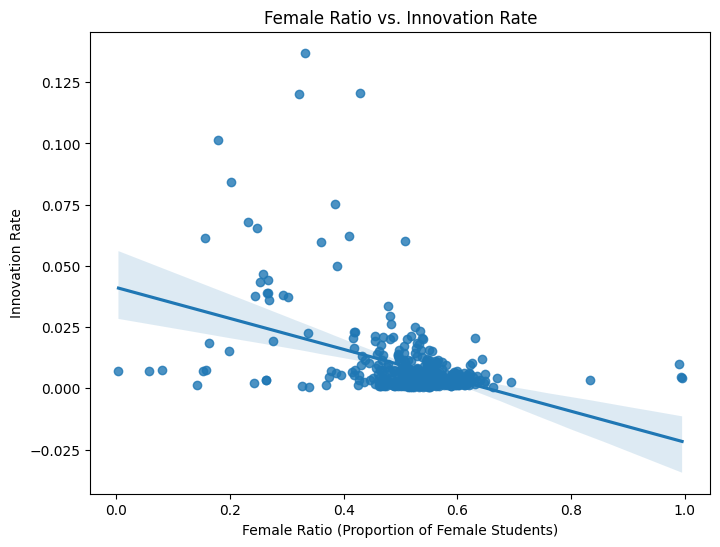

                            OLS Regression Results                            
Dep. Variable:               inventor   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     95.72
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.69e-20
Time:                        21:48:31   Log-Likelihood:                 1197.5
No. Observations:                 422   AIC:                            -2391.
Df Residuals:                     420   BIC:                            -2383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0412      0.003     12.186      0.0

In [ ]:
# Scatter plot of Female Ratio vs. innovation rate
plt.figure(figsize=(8, 6))
sns.regplot(x='female', y='inventor', data=merged_data)
plt.xlabel('Female Ratio (Proportion of Female Students)')
plt.ylabel('Innovation Rate')
plt.title('Female Ratio vs. Innovation Rate')
plt.show()

# Regression analysis
model_gender = sm.OLS.from_formula("inventor ~ female", data=merged_data).fit()
print(model_gender.summary())

Using the Blau index, which measures the degree of heterogeneity in a categorical variable (for gender diversity)

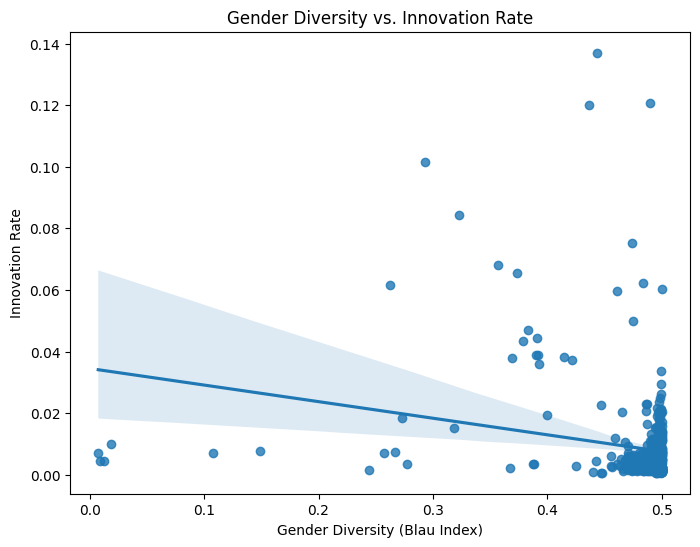

                            OLS Regression Results                            
Dep. Variable:               inventor   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     21.25
Date:                Wed, 08 May 2024   Prob (F-statistic):           5.35e-06
Time:                        21:59:43   Log-Likelihood:                 1164.6
No. Observations:                 422   AIC:                            -2325.
Df Residuals:                     420   BIC:                            -2317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0345      0.006      6.138      0.0

In [ ]:
# Calculate Blau index for gender diversity
merged_data['blau_index'] = 1 - (merged_data['female']**2 + (1 - merged_data['female'])**2)

# Scatter plot of Blau index vs. innovation rate
plt.figure(figsize=(8, 6))
sns.regplot(x='blau_index', y='inventor', data=merged_data)
plt.xlabel('Gender Diversity (Blau Index)')
plt.ylabel('Innovation Rate')
plt.title('Gender Diversity vs. Innovation Rate')
plt.show()

# Regression analysis
model_diversity = sm.OLS.from_formula("inventor ~ blau_index", data=merged_data).fit()
print(model_diversity.summary())

In [58]:
merged_data.head(5)
# what type of variable is tier?
merged_data['tier'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], ordered=False, categories_dtype=float64)

In [148]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.oaxaca import OaxacaBlinder

# Oaxaca-Blinder Decomposition
def oaxaca_blinder_continuous(data, group_var, interest, predictors):
    # group1_data = data[data[group_var] == 0]
    # group2_data = data[data[group_var] == 1]

    X1 = sm.add_constant(data[predictors])
    # X2 = sm.add_constant(group2_data[predictors])
    y1 = data[interest]
    # y2 = group2_data['mr_kq5_pq1']
    # print (X1.head(5))
    oaxaca_result = OaxacaBlinder(endog=y1, exog=X1, bifurcate=group_var)
    return oaxaca_result

dropped = ['k_married', 'inventor', 'inventor_pq1', 'inventor_pq5', 'diff_q1_q2', 'diff_q1', 'blau_index', 'mr_ktop1_pq1', 
              'k_rank', 'k_mean', 'k_median', 'k_median_nozero', 'k_0inc', 'liior', 'mr_kq5_pq1',
              'shareimputed', 'imputed']  # Add other relevant predictors

merged_data_clean = merged_data.dropna(subset=dropped)
merged_data_clean['tier_high_low'] = (merged_data_clean['tier'].isin([1, 2, 3, 4, 5])).astype(int)
predictors = ['k_married',
               'inventor', 'inventor_pq1', 
               'inventor_pq5', 'diff_q1_q2', 'diff_q1', 'blau_index', 'mr_ktop1_pq1',
              'k_rank', 'k_mean', 'k_median', 'k_median_nozero', 'k_0inc', 'liior',
              'shareimputed', 'imputed', 'tier_high_low']  # Add other relevant predictors
print(merged_data_clean['tier_high_low'].value_counts())
ob_results_inventor_pq1 = oaxaca_blinder_continuous(merged_data_clean, 'tier_high_low', 'mr_kq5_pq1', predictors)
print(ob_results_inventor_pq1.two_fold().summary())
predictors = ['k_married', 'inventor', 'inventor_pq1', 'inventor_pq5', 'diff_q1_q2', 'diff_q1', 'blau_index',
              'k_rank', 'k_mean', 'k_median', 'k_median_nozero', 'k_0inc', 'liior',
              'shareimputed', 'imputed', 'tier_high_low']  # Add other relevant predictors
ob_results_inventor_pq2 = oaxaca_blinder_continuous(merged_data_clean, 'tier_high_low', 'mr_ktop1_pq1', predictors)
print(ob_results_inventor_pq2.two_fold().summary())
predictors = ['k_married', 'inventor_pq5', 'diff_q1_q2', 'diff_q1', 'blau_index', 'mr_ktop1_pq1',
              'k_rank', 'k_mean', 'k_median', 'k_median_nozero', 'k_0inc',
              'shareimputed', 'imputed', 'tier_high_low']  # Add other relevant predictors
ob_results_inventor_pq2 = oaxaca_blinder_continuous(merged_data_clean, 'tier_high_low', 'liior', predictors)
print(ob_results_inventor_pq2.two_fold().summary())

tier_high_low
1    276
0    146
Name: count, dtype: int64
Oaxaca-Blinder Two-fold Effects
Unexplained Effect: 0.00267
Explained Effect: -0.00004
Gap: 0.00263
None
Oaxaca-Blinder Two-fold Effects
Unexplained Effect: 0.00025
Explained Effect: 0.00060
Gap: 0.00085
None
Oaxaca-Blinder Two-fold Effects
Unexplained Effect: 0.02212
Explained Effect: 0.05532
Gap: 0.07745
None


/var/folders/8r/09lwc9312jl_hr20wdddssrm0000gn/T/ipykernel_19526/3040198475.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['tier_high_low'] = (merged_data_clean['tier'].isin([1, 2, 3, 4, 5])).astype(int)


In [154]:
import statsmodels.api as sm

def run_regressions(data, group_var, outcome_vars, predictors_dict):
    group1_data = data[data[group_var] == 0]
    group2_data = data[data[group_var] == 1]

    for outcome_var, predictors in predictors_dict.items():
        print(f"Regression results for outcome variable: {outcome_var}")

        # Regression for group 1
        X1 = sm.add_constant(group1_data[predictors])
        y1 = group1_data[outcome_var]
        model1 = sm.OLS(y1, X1).fit()
        print("Group 1 (Low-Tier Colleges):")
        print(model1.summary())

        # Regression for group 2
        X2 = sm.add_constant(group2_data[predictors])
        y2 = group2_data[outcome_var]
        model2 = sm.OLS(y2, X2).fit()
        print("Group 2 (High-Tier Colleges):")
        print(model2.summary())

        print("---")

# Specify the outcome variables and their respective predictors
outcome_vars = ['mr_kq5_pq1', 'mr_ktop1_pq1', 'liior']
predictors_dict = {
    'mr_kq5_pq1': ['k_married', 'inventor', 'inventor_pq1', 'inventor_pq5', 'diff_q1_q2', 'diff_q1', 'blau_index',
                   'k_rank', 'k_mean', 'k_median', 'k_median_nozero', 'k_0inc', 'liior',
                   'shareimputed', 'imputed'],
    'mr_ktop1_pq1': ['k_married', 'inventor', 'inventor_pq1', 'inventor_pq5', 'diff_q1_q2', 'diff_q1', 'blau_index',
                     'k_rank', 'k_mean', 'k_median', 'k_median_nozero', 'k_0inc', 'liior', 'shareimputed', 'imputed',
                     ],
    'liior': ['k_married', 'inventor_pq5', 'blau_index', 'mr_ktop1_pq1', 'mr_kq5_pq1', 'k_rank', 'k_mean',
              'k_median', 'k_median_nozero', 'k_0inc', 'shareimputed', 'imputed',]
}

# Run regressions for each outcome variable
run_regressions(merged_data_clean, 'tier_high_low', outcome_vars, predictors_dict)

Regression results for outcome variable: mr_kq5_pq1
Group 1 (Low-Tier Colleges):
                            OLS Regression Results                            
Dep. Variable:             mr_kq5_pq1   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     8.415
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.06e-12
Time:                        14:33:58   Log-Likelihood:                 511.98
No. Observations:                 146   AIC:                            -994.0
Df Residuals:                     131   BIC:                            -949.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------